In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
seed = 42

# 逆関数サンプリング

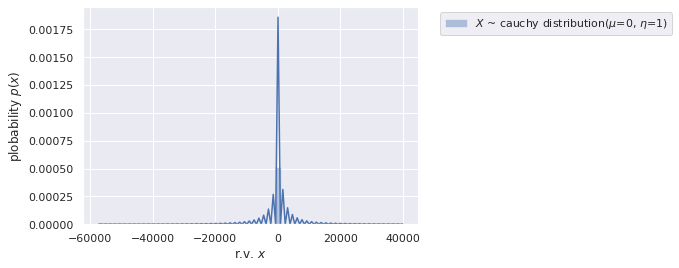

In [27]:
#コーシー分布のサンプリング
np.random.seed(seed)
mu, eta = 0., 1.

#逆関数サンプリング
N = 100000      # サンプリングする点の数
samples = []
for _ in range(N):
    U = np.random.rand()
    X = mu + eta * np.tan(np.pi * (U - 1/2))
    samples.append(X)
samples = np.array(samples)

#結果の描画
sns.distplot(samples, label='$X$ ~ cauchy distribution($\mu$=0, $\eta$=1)')
plt.xlabel('r.v. $x$')
plt.ylabel('plobability $p(x)$')
plt.legend(bbox_to_anchor=(1.05, 1))

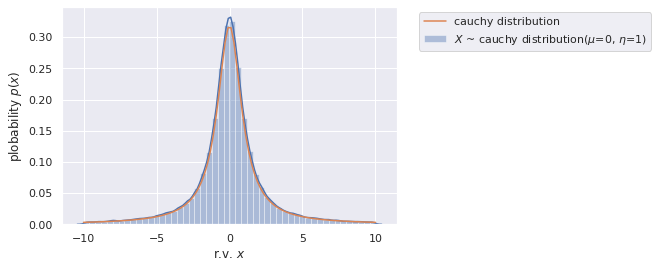

In [28]:
# コーシー分布は裾野が広く極端な値も出やすいため, 端の方を切り捨てて描画
sns.distplot(samples[(samples>-10) & (samples<10)], label='$X$ ~ cauchy distribution($\mu$=0, $\eta$=1)')

#コーシー分布を描画
x = np.linspace(-10, 10, 100)
y = (1 / np.pi) * (eta / ((x - mu)**2 + eta**2))
plt.plot(x, y, label='cauchy distribution')

plt.xlabel('r.v. $x$')
plt.ylabel('plobability $p(x)$')
plt.legend(bbox_to_anchor=(1.05, 1))

# 棄却サンプリング

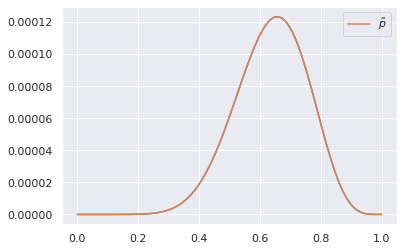

In [46]:
a, b = 10.2, 5.8
x = np.linspace(0, 1, 100)
y = (x ** (a - 1)) * ((1 - x) ** (b - 1))   # 正規化定数を無視したベータ分布の確率密度関数の値
plt.plot(x, y)
plt.plot(x, y, label=r'$\tilde{p}$')  # ベータ分布を描画
plt.legend()

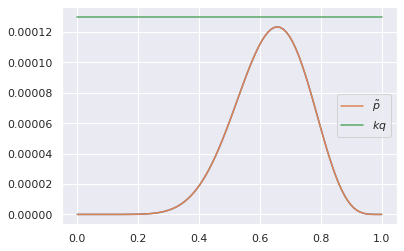

In [42]:
a, b = 10.2, 5.8
x = np.linspace(0, 1, 100)
y = (x ** (a - 1)) * ((1 - x) ** (b - 1))   # 正規化定数を無視したベータ分布の確率密度関数の値
plt.plot(x, y)
plt.plot(x, y, label=r'$\tilde{p}$')  # ベータ分布を描画

K = 0.00013
kq = np.array([K] * len(x))    #提案分布
plt.plot(x, kq, label='$kq$')  # 提案分布を描画

plt.legend()

サンプリングを試みた回数:  100000 回
サンプリング個数:  28838 個

サンプリング - 事後期待値:  0.6388032586392817
真の値　　　 - 事後期待値:  0.6375

サンプリング - 事後分散:  0.013665336780805358
真の値　　　 - 事後分散:  0.01359375

サンプリング - 事後標準偏差:  0.11689883139195771
真の値　　　 - 事後標準偏差:  0.11659223816361018

サンプリング - 事後確率最大値:  0.6571350358218119
真の値　　　 - 事後確率最大値:  0.6571428571428571

サンプリング - 事後中央値:  0.6454781050712388
真の値(np)　 - 事後中央値:  0.6433608949743185
真の値(wiki) - 事後中央値:  0.643478260869565


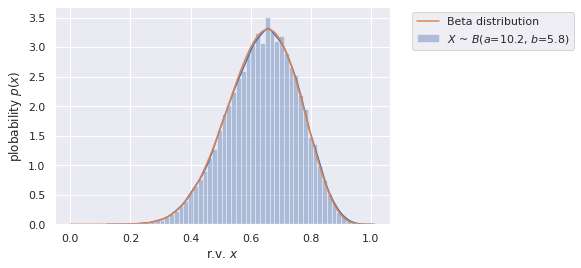

In [35]:
#ベータ分布のサンプリング
from scipy.stats import beta
np.random.seed(seed)

a, b = 10.2, 5.8
x = np.linspace(0, 1, 100)
y = beta(a, b).pdf(x)   # 正規化定数で割ったベータ分布の確率密度関数の値

# 棄却サンプリング
N = 100000      # サンプリングする点の数(棄却込み)
samples = np.array([])    # サンプリングした点データ
K = 0.00013
kq = np.array([K] * len(x))    #提案分布

for _ in range(N):
    xp = np.random.uniform(0, 1)
    yp = np.random.uniform(0, K)
    pdf = (xp ** (a - 1)) * ((1 - xp) ** (b - 1))
    if(yp <= pdf):
        samples = np.append(samples, xp)

# 統計量を比較 

# データ
print("サンプリングを試みた回数: ", N, "回")
print("サンプリング個数: ", len(samples), "個")
print()

# 事後平均値
mu = np.sum(samples) / len(samples);
print("サンプリング - 事後期待値: ", mu)
print("真の値　　　 - 事後期待値: ", a / (a + b))
print()

# 事後分散
v = np.sum((samples - mu) ** 2 ) / len(samples)
print("サンプリング - 事後分散: ", v)
print("真の値　　　 - 事後分散: ", (a * b) / (((a + b) ** 2) * (a + b + 1)))
print()

# 事後標準偏差
print("サンプリング - 事後標準偏差: ", v ** 0.5)
print("真の値　　　 - 事後標準偏差: ", ((a * b) / (((a + b) ** 2) * (a + b + 1))) ** 0.5)
print()

# 事後確率最大値
maxIndex = np.argmax((samples ** (a - 1)) * ((1 - samples) ** (b - 1)))
print("サンプリング - 事後確率最大値: ", samples[maxIndex])
print("真の値　　　 - 事後確率最大値: ", (a - 1) / (a + b - 2))
print()

# 事後中央値
sorted_samples = sorted(samples)
if(len(sorted_samples) % 2 != 0):# 奇数
    midIndex = int((len(sorted_samples) - 1) / 2)
    midX = sorted_samples[midIndex]
else:# 偶数
    midIndex = int(len(sorted_samples) / 2)
    midX = (sorted_samples[midIndex] + sorted_samples[midIndex - 1]) / 2
print("サンプリング - 事後中央値: ", midX)    # np.median(samples)と同じ
print("真の値(np)　 - 事後中央値: ", beta(a, b).median())
print("真の値(wiki) - 事後中央値: ", (a - (1/3)) / (a + b - (2/3) ))

# 結果の描画
sns.distplot(samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)')
plt.plot(x, y, label='Beta distribution')  # ベータ分布を描画
plt.xlabel('r.v. $x$')
plt.ylabel('plobability $p(x)$')
plt.legend(bbox_to_anchor=(1.05, 1))

# Metropolis法

Text(336.9714285714286, 0.5, 'r.v. $x$')

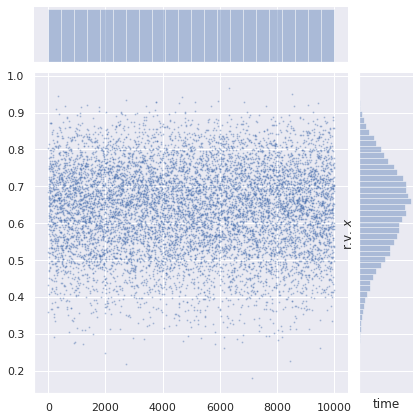

In [71]:
#提案分布は[0, 1]上の一様分布

np.random.seed(seed)

def p(x, a=10.2, b=5.8):
    return (x ** (a - 1)) * ((1 - x) ** (b - 1))

N = 100000
z = 0.5    # 初期位置
samples=[]
cnt=0
for _ in range(N):
    z_next = np.random.uniform(0, 1) #提案分布は[0, 1]上の一様分布
    A = min(1, p(z_next)/p(z))
    #確率 r で受容
    r = np.random.uniform(0, 1)
    if r > A:
        z_next = z
    z = z_next
    cnt += 1
    if cnt%10==0:
        samples.append(z)
samples = np.array(samples)

# 結果の描画
times = np.arange(0, len(samples))
sns.jointplot(times, samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)', alpha=0.3, s=1)
plt.xlabel('time')
plt.ylabel('r.v. $x$')

サンプリング - 事後期待値:  0.6381350592549757
真の値　　　 - 事後期待値:  0.6375

サンプリング - 事後分散:  0.013501308101143857
真の値　　　 - 事後分散:  0.01359375

サンプリング - 事後標準偏差:  0.11619512942091789
真の値　　　 - 事後標準偏差:  0.11659223816361018

サンプリング - 事後確率最大値:  0.6571350358218119
真の値　　　 - 事後確率最大値:  0.6571428571428571

サンプリング - 事後中央値:  0.646150724391713
真の値(np)　 - 事後中央値:  0.6433608949743185
真の値(wiki) - 事後中央値:  0.643478260869565


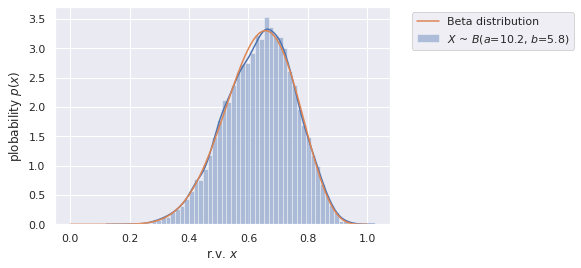

In [66]:
a, b = 10.2, 5.8
x = np.linspace(0, 1, 100)
y = beta(a, b).pdf(x)

# 統計量を比較 

# 事後平均値
mu = np.sum(samples) / len(samples);
print("サンプリング - 事後期待値: ", mu)
print("真の値　　　 - 事後期待値: ", a / (a + b))
print()

# 事後分散
v = np.sum((samples - mu) ** 2 ) / len(samples)
print("サンプリング - 事後分散: ", v)
print("真の値　　　 - 事後分散: ", (a * b) / (((a + b) ** 2) * (a + b + 1)))
print()

# 事後標準偏差
print("サンプリング - 事後標準偏差: ", v ** 0.5)
print("真の値　　　 - 事後標準偏差: ", ((a * b) / (((a + b) ** 2) * (a + b + 1))) ** 0.5)
print()

# 事後確率最大値
maxIndex = np.argmax((samples ** (a - 1)) * ((1 - samples) ** (b - 1)))
print("サンプリング - 事後確率最大値: ", samples[maxIndex])
print("真の値　　　 - 事後確率最大値: ", (a - 1) / (a + b - 2))
print()

# 事後中央値
sorted_samples = sorted(samples)
if(len(sorted_samples) % 2 != 0):# 奇数
    midIndex = int((len(sorted_samples) - 1) / 2)
    midX = sorted_samples[midIndex]
else:# 偶数
    midIndex = int(len(sorted_samples) / 2)
    midX = (sorted_samples[midIndex] + sorted_samples[midIndex - 1]) / 2
print("サンプリング - 事後中央値: ", midX)    # np.median(samples)と同じ
print("真の値(np)　 - 事後中央値: ", beta(a, b).median())
print("真の値(wiki) - 事後中央値: ", (a - (1/3)) / (a + b - (2/3) ))

sns.distplot(samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)')
plt.plot(x, y, label='Beta distribution')  # ベータ分布を描画
plt.xlabel('r.v. $x$')
plt.ylabel('plobability $p(x)$')
plt.legend(bbox_to_anchor=(1.05, 1))

Text(336.9714285714286, 0.5, 'r.v. $x$')

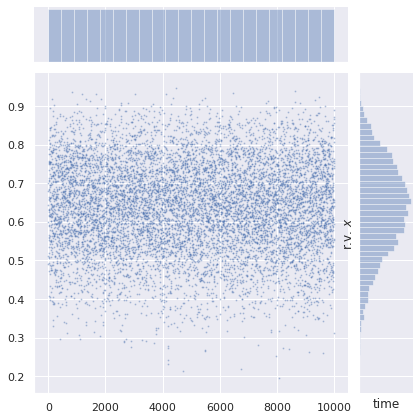

In [75]:
#ランダムウォーク MH法, すなわち提案分布に N(z, 0.1)

from scipy.stats import norm
np.random.seed(seed)

def p(x, a=10.2, b=5.8):
    return (x ** (a - 1)) * ((1 - x) ** (b - 1))

N = 100000
z = 0.5    # 初期位置
samples=[]
cnt=0
for _ in range(N):
    z_next = z + np.random.normal(loc=0, scale=0.1)    #提案分布に N(z, 0.1)
    z_next = min(z_next, 1)
    z_next = max(z_next, 0)
    A = min(1, p(z_next)/p(z))
    #確率 r で受容
    r = np.random.uniform(0, 1)
    if r > A:
        z_next = z
    z = z_next
    cnt += 1
    if cnt%10==0:
        samples.append(z)
samples = np.array(samples)

# 結果の描画
times = np.arange(0, len(samples))
sns.jointplot(times, samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)', alpha=0.3, s=1)
plt.xlabel('time')
plt.ylabel('r.v. $x$')

サンプリング - 事後期待値:  0.6376228981575006
真の値　　　 - 事後期待値:  0.6375

サンプリング - 事後分散:  0.013552161697094885
真の値　　　 - 事後分散:  0.01359375

サンプリング - 事後標準偏差:  0.11641375218201191
真の値　　　 - 事後標準偏差:  0.11659223816361018

サンプリング - 事後確率最大値:  0.6571373285091169
真の値　　　 - 事後確率最大値:  0.6571428571428571

サンプリング - 事後中央値:  0.6422324074581105
真の値(np)　 - 事後中央値:  0.6433608949743185
真の値(wiki) - 事後中央値:  0.643478260869565


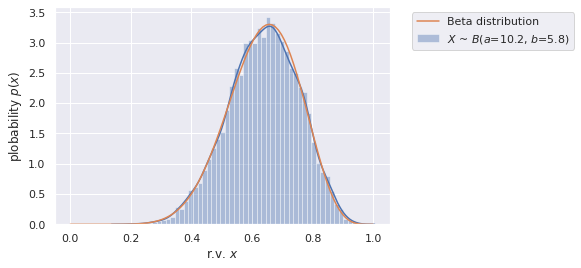

In [76]:
a, b = 10.2, 5.8
x = np.linspace(0, 1, 100)
y = beta(a, b).pdf(x)

# 統計量を比較 

# 事後平均値
mu = np.sum(samples) / len(samples);
print("サンプリング - 事後期待値: ", mu)
print("真の値　　　 - 事後期待値: ", a / (a + b))
print()

# 事後分散
v = np.sum((samples - mu) ** 2 ) / len(samples)
print("サンプリング - 事後分散: ", v)
print("真の値　　　 - 事後分散: ", (a * b) / (((a + b) ** 2) * (a + b + 1)))
print()

# 事後標準偏差
print("サンプリング - 事後標準偏差: ", v ** 0.5)
print("真の値　　　 - 事後標準偏差: ", ((a * b) / (((a + b) ** 2) * (a + b + 1))) ** 0.5)
print()

# 事後確率最大値
maxIndex = np.argmax((samples ** (a - 1)) * ((1 - samples) ** (b - 1)))
print("サンプリング - 事後確率最大値: ", samples[maxIndex])
print("真の値　　　 - 事後確率最大値: ", (a - 1) / (a + b - 2))
print()

# 事後中央値
sorted_samples = sorted(samples)
if(len(sorted_samples) % 2 != 0):# 奇数
    midIndex = int((len(sorted_samples) - 1) / 2)
    midX = sorted_samples[midIndex]
else:# 偶数
    midIndex = int(len(sorted_samples) / 2)
    midX = (sorted_samples[midIndex] + sorted_samples[midIndex - 1]) / 2
print("サンプリング - 事後中央値: ", midX)    # np.median(samples)と同じ
print("真の値(np)　 - 事後中央値: ", beta(a, b).median())
print("真の値(wiki) - 事後中央値: ", (a - (1/3)) / (a + b - (2/3) ))

sns.distplot(samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)')
plt.plot(x, y, label='Beta distribution')  # ベータ分布を描画
plt.xlabel('r.v. $x$')
plt.ylabel('plobability $p(x)$')
plt.legend(bbox_to_anchor=(1.05, 1))

# ハミルトニアンモンテカルロ法

In [174]:
a, b = 10.2, 5.8

def h(x):
    global a, b
    return - np.log((x ** (a - 1)) * ((1 - x) ** (b - 1)))

def dh_dtheta(x):
    global a, b
    return  - (a - 1)/(x) + (b - 1)/(1 - x)

def hamiltonian(z, r):
    return h(z) + 0.5*r**2

def leapfrog_nexthalf_r(z, r, eps=0.01):
    """
    1/2ステップ後のrを計算
    """
    return r - 0.5 * eps* dh_dtheta(z)

def leapfrog_next_z(z, r, eps=0.01):
    """
    1ステップ後のzを計算
    """
    z_next = z + eps*r
    z_next = min(z_next, 1-1e-16)
    z_next = max(z_next, 0+1e-16)
    return z_next

def move_one_step(z, r, eps=0.01, L=100, stlide=1):
    """
    リープフロッグ法でL回移動した１ステップを実行
    """
    ret = []
    ret.append([z, r, hamiltonian(z,r)])
    for _ in range(L):
        r = leapfrog_nexthalf_r(z, r, eps)
        z = leapfrog_next_z(z, r, eps)
        r = leapfrog_nexthalf_r(z, r, eps)
        ret.append([z, r, hamiltonian(z,r)])
    return ret[::stlide]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0, 0.5, '$z$')

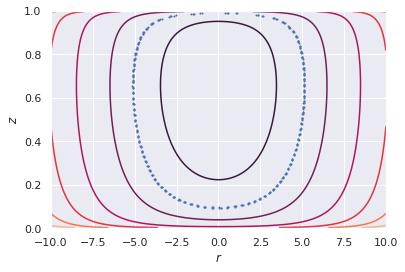

In [180]:
r = np.linspace(-10, 10, 1000)
z = np.linspace(-1, 2, 1000)

X, Y = np.meshgrid(r, z)
H = hamiltonian(Y, X)

plt.contour(X, Y, H)
plt.xlim(-10 ,10)
plt.ylim(0 ,1)

z = 0.5
r = 5
result = move_one_step(z, r, eps=0.005, L=400, stlide=1)
zlist = [i[0] for i in result]
rlist = [i[1] for i in result]
plt.scatter(rlist, zlist, s=1)
plt.xlabel('$r$')
plt.ylabel('$z$')

Text(336.9714285714286, 0.5, 'r.v. $x$')

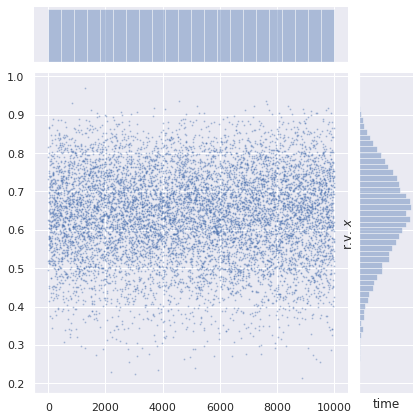

In [192]:
np.random.seed(seed)

def p(x, a=10.2, b=5.8):
    return (x ** (a - 1)) * ((1 - x) ** (b - 1))

N = 100000
z = 0.5    # 初期位置
samples=[]
cnt=0
for _ in range(N):
    r = np.random.normal(loc=0, scale=5)
    result = move_one_step(z, r, eps=0.01, L=50, stlide=1)
    z_next, r_next = result[-1][0], result[-1][1]
    A = min(1, p(z_next)/p(z))
    #確率 q で受容
    q = np.random.uniform(0, 1)
    if q > A:
        z_next = z
    z = z_next
    cnt += 1
    if cnt%10==0:
        samples.append(z)
samples = np.array(samples)

# 結果の描画
times = np.arange(0, len(samples))
sns.jointplot(times, samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)', alpha=0.3, s=1)
plt.xlabel('time')
plt.ylabel('r.v. $x$')

サンプリング - 事後期待値:  0.6376929323798256
真の値　　　 - 事後期待値:  0.6375

サンプリング - 事後分散:  0.013004349936383454
真の値　　　 - 事後分散:  0.01359375

サンプリング - 事後標準偏差:  0.11403661664738854
真の値　　　 - 事後標準偏差:  0.11659223816361018

サンプリング - 事後確率最大値:  0.6571343917032475
真の値　　　 - 事後確率最大値:  0.6571428571428571

サンプリング - 事後中央値:  0.6429636979085349
真の値(np)　 - 事後中央値:  0.6433608949743185
真の値(wiki) - 事後中央値:  0.643478260869565


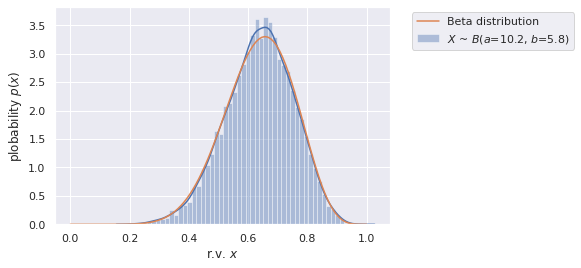

In [193]:
a, b = 10.2, 5.8
x = np.linspace(0, 1, 100)
y = beta(a, b).pdf(x)

# 統計量を比較 

# 事後平均値
mu = np.sum(samples) / len(samples);
print("サンプリング - 事後期待値: ", mu)
print("真の値　　　 - 事後期待値: ", a / (a + b))
print()

# 事後分散
v = np.sum((samples - mu) ** 2 ) / len(samples)
print("サンプリング - 事後分散: ", v)
print("真の値　　　 - 事後分散: ", (a * b) / (((a + b) ** 2) * (a + b + 1)))
print()

# 事後標準偏差
print("サンプリング - 事後標準偏差: ", v ** 0.5)
print("真の値　　　 - 事後標準偏差: ", ((a * b) / (((a + b) ** 2) * (a + b + 1))) ** 0.5)
print()

# 事後確率最大値
maxIndex = np.argmax((samples ** (a - 1)) * ((1 - samples) ** (b - 1)))
print("サンプリング - 事後確率最大値: ", samples[maxIndex])
print("真の値　　　 - 事後確率最大値: ", (a - 1) / (a + b - 2))
print()

# 事後中央値
sorted_samples = sorted(samples)
if(len(sorted_samples) % 2 != 0):# 奇数
    midIndex = int((len(sorted_samples) - 1) / 2)
    midX = sorted_samples[midIndex]
else:# 偶数
    midIndex = int(len(sorted_samples) / 2)
    midX = (sorted_samples[midIndex] + sorted_samples[midIndex - 1]) / 2
print("サンプリング - 事後中央値: ", midX)    # np.median(samples)と同じ
print("真の値(np)　 - 事後中央値: ", beta(a, b).median())
print("真の値(wiki) - 事後中央値: ", (a - (1/3)) / (a + b - (2/3) ))

sns.distplot(samples, label='$X$ ~ $B$($a$=10.2, $b$=5.8)')
plt.plot(x, y, label='Beta distribution')  # ベータ分布を描画
plt.xlabel('r.v. $x$')
plt.ylabel('plobability $p(x)$')
plt.legend(bbox_to_anchor=(1.05, 1))